<a href="https://colab.research.google.com/github/tago893/capstone/blob/main/models/ARIMA_D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ethereum Predictions with ARIMA

## Contents:
* [Monthly Forecasting](#monthlyForecasting)
    * [Stationarity check and Seasonal decomposition](#StationarityCheck)
    * [Transformation](#Transformation)
    * [Differencing](#Differencing)
        * [Seasonal differentiation](#SeasonalDifferentiation")
        * [Regular differentiation](#RegularDifferentiation")
    * [Autocorrelation](#Autocorrelation")
    * [ARIMAModel](#ARIMAModel")
        * [Analysis of Results](#AnalysisARIMA")
        * [PredictionARIMA](#PredictionARIMA")

In [ ]:
!pip install pandas-datareader
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 124.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 178.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 124.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 138.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 123.5 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2

In [ ]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() 

# download dataframe
data = pdr.get_data_yahoo("ETH-USD")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2023-03-07,1567.424683,1579.162231,1543.127563,1561.933105,1561.933105,6854058349
2023-03-08,1561.977905,1568.175293,1534.088257,1534.088257,1534.088257,7130327525
2023-03-09,1534.031616,1544.108398,1423.264771,1438.660767,1438.660767,9457897583


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1949 entries, 2017-11-09 to 2023-03-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1949 non-null   float64
 1   High       1949 non-null   float64
 2   Low        1949 non-null   float64
 3   Close      1949 non-null   float64
 4   Adj Close  1949 non-null   float64
 5   Volume     1949 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 106.6 KB


In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Visualization


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

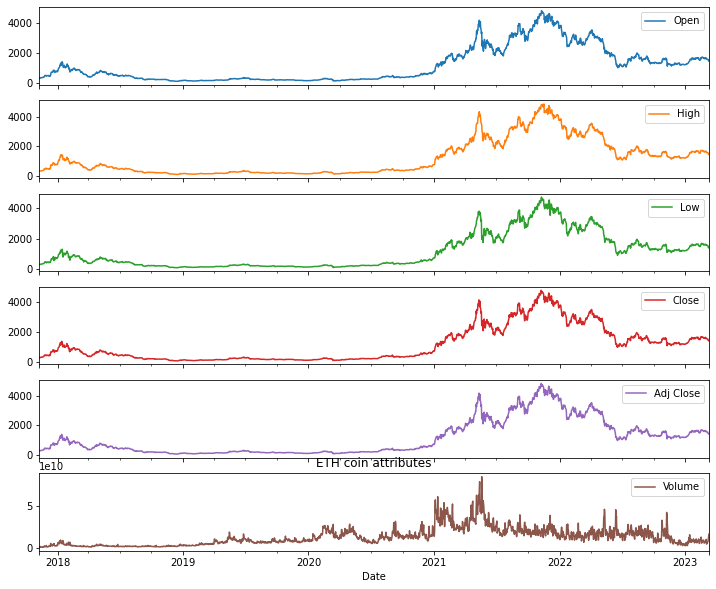

In [ ]:
selected_columns = ['Open', 'High', 'Low', 'Close','Adj Close','Volume']
data[selected_columns].plot(subplots=True, figsize=(12,10))
plt.title('ETH coin attributes')
plt.show()

In [ ]:
df2=pdr.get_data_yahoo("ETH-USD",)
del df2["Adj Close"]


[*********************100%***********************]  1 of 1 completed


In [ ]:
df2.describe()

,Open,High,Low,Close,Volume
count,1949.000000,1949.000000,1949.000000,1949.000000,1.949000e+03
mean,1144.357997,1180.406573,1103.569860,1144.706786,1.271375e+10
std,1169.791965,1205.283041,1128.764349,1169.190746,1.064882e+10
min,84.279694,85.342743,82.829887,84.308296,6.217330e+08
25%,215.352066,220.367004,208.830734,215.325378,4.578438e+09
50%,568.609863,589.606995,549.096008,569.354187,1.030311e+10
75%,1703.036133,1756.510986,1665.090454,1703.025024,1.793320e+10
max,4810.071289,4891.704590,4718.039062,4812.087402,8.448291e+10


# Monthly Forecasting <a name="monthlyForecasting"></a>

This plot helps us visualize the max and min values of monthly helping us
infering that:

1. 30th november 2021 has the high maximum price and 31st december 2018 has high minimum price compared to other years
2. From year 2019 to 2020 the maximum and minimum closing prices of Ethereum closing price are near.

In [ ]:
df2_month=df2.resample(rule="MS").mean()

In [ ]:
df2_month

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-01,373.696317,393.111908,363.283635,379.732093,1.225341e+09
2017-12-01,630.583997,667.252580,596.163133,640.209291,2.576202e+09
2018-01-01,1093.099893,1163.799714,1024.934606,1103.646004,5.277749e+09
2018-02-01,882.527006,917.850394,825.723679,873.116318,2.978337e+09
2018-03-01,640.787129,653.875259,606.506935,625.761325,1.732780e+09
...,...,...,...,...,...
2022-11-01,1307.122107,1341.226990,1262.868237,1297.930184,1.405993e+10
2022-12-01,1240.294394,1255.038866,1221.342147,1237.105890,5.197763e+09
2023-01-01,1454.913763,1486.601736,1434.767791,1466.950026,7.256547e+09


<AxesSubplot:xlabel='Date'>

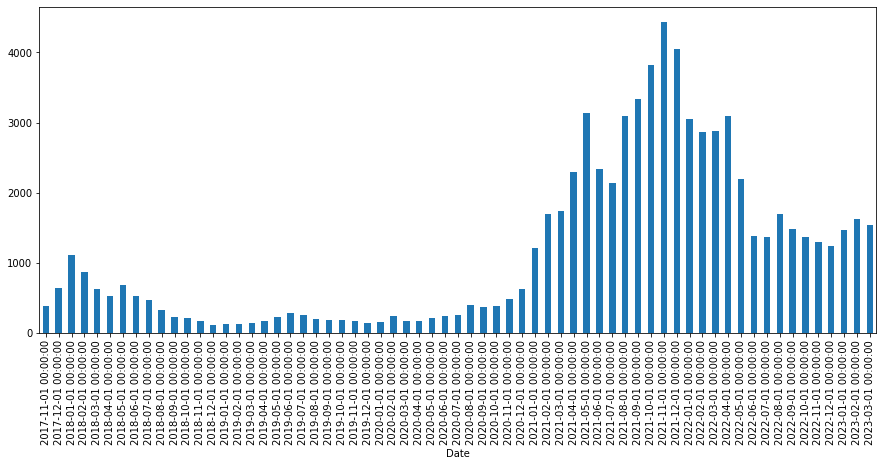

In [ ]:
df2['Close'].resample(rule='MS').mean().plot(kind="bar",figsize=(15,6))

# Stationarity check and seasonal decomposition<a name="StationarityCheck"></a>

##Stationarity check

If a time series is stationary, it implies the lack of broad trends (changes in mean and variance over time) in the data. This is important as a consideration in time series forecasting.

In [ ]:
import statsmodels.api as sm

<Figure size 2160x720 with 0 Axes>

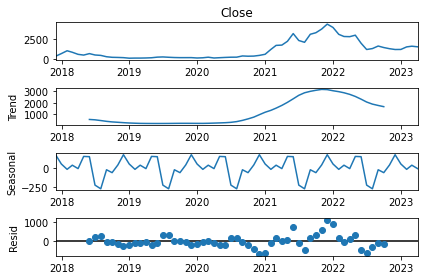

In [ ]:
plt.figure(figsize=[30,10])
sm.tsa.seasonal_decompose(df2.resample(rule='M').median().Close).plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adf_test(data['Close'])

ADF Statistics: -1.436327942942264
p- value: 0.5647415269527393
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df2_daily = df2.resample('D').mean()
df2_daily

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,8.932500e+08
2017-11-10,320.670990,324.717987,294.541992,299.252991,8.859860e+08
2017-11-11,298.585999,319.453003,298.191986,314.681000,8.423010e+08
2017-11-12,314.690002,319.153015,298.513000,307.907990,1.613480e+09
2017-11-13,307.024994,328.415009,307.024994,316.716003,1.041890e+09
...,...,...,...,...,...
2023-03-07,1567.424683,1579.162231,1543.127563,1561.933105,6.854058e+09
2023-03-08,1561.977905,1568.175293,1534.088257,1534.088257,7.130328e+09
2023-03-09,1534.031616,1544.108398,1423.264771,1438.660767,9.457898e+09


#Feature Engineering

## Box-Cox Transformation <a name="Transformation"></a>

Lets use the Box-Cox transformation to suppress some of the variance.

The Box-Cox transformation is a family of power transformations indexed by a parameter lambda. Whenever you use it the parameter needs to be estimated from the data. In time series the process could have a non-constant variance. if the variance changes with time the process is nonstationary. It is often desirable to transform a time series to make it stationary. Sometimes after applying Box-Cox with a particular value of lambda the process may look stationary. It is sometimes possible that even if after applying the Box-Cox transformation the series does not appear to be stationary, diagnostics from ARIMA modeling can then be used to decide if differencing or seasonal differencing might be useful to to remove polynomial trends or seasonal trends respectively. After that the result might be an ARMA model that is stationary. If diagnostics confirm the orders p and q for the ARMA model, the AR and MA parameters can then be estimated.

In [ ]:
# Box-Cox Transformations
df2_daily['close_box'], lmbda = stats.boxcox(df2_daily.Close)
print("Dickey–Fuller test: p=%f" % adfuller(df2_daily.close_box)[1])

Dickey–Fuller test: p=0.727131


:The p-value indicates that series is still not stationary.


## Seasonal decomposition

Dickey–Fuller test: p=0.564742


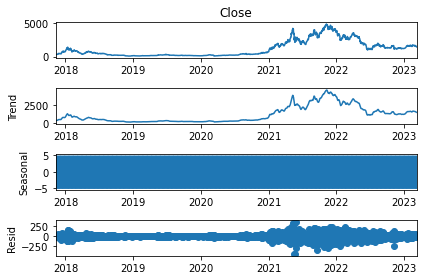

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df2.Close).plot()
print("Dickey–Fuller test: p=%f" % adfuller(data.Close)[1])
plt.show()

The p-value indicates that series is still not stationary.


## Differencing <a name="Differencing"></a>

When building models to forecast time series data (like ARIMA), another pre-processing step is differencing the data (calculating sequentially xt−xt−1) until we get to a point where the series is stationary. 


In [ ]:
# Seasonal differentiation (12 months)
df2_daily['box_diff_seasonal_12'] = df2_daily.close_box - df2_daily.close_box.shift(12)
print("Dickey–Fuller test: p=%f" % adfuller(df2_daily.box_diff_seasonal_12[12:])[1])

Dickey–Fuller test: p=0.000000


Dickey–Fuller test: p=0.000000


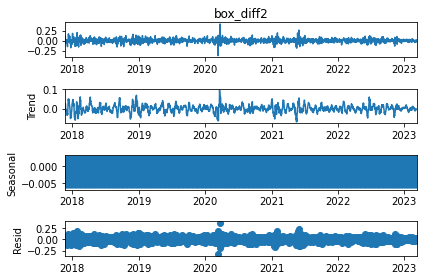

In [ ]:
# Regular differentiation
df2_daily['box_diff2'] = df2_daily.box_diff_seasonal_12 - df2_daily.box_diff_seasonal_12.shift(1)

# STL-decomposition
seasonal_decompose(df2_daily.box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % adfuller(df2_daily.box_diff2[13:])[1])

plt.show()

The p-value indicates that series is stationary.


In [ ]:
df2_daily.Close

Date
2017-11-09     320.884003
2017-11-10     299.252991
2017-11-11     314.681000
2017-11-12     307.907990
2017-11-13     316.716003
                 ...     
2023-03-07    1561.933105
2023-03-08    1534.088257
2023-03-09    1438.660767
2023-03-10    1429.158081
2023-03-11    1441.042969
Freq: D, Name: Close, Length: 1949, dtype: float64

## Autocorrelation  <a name="Autocorrelation"></a>

Autocorrelation is the correlation of a time series with the same time series lagged. It summarizes the strength of a relationship with an observation in a time series with observations at prior time steps.

We create autocorrelation factor (ACF) and partial autocorrelation factor (PACF) plots to identify patterns in the above data which is stationary on both mean and variance. The idea is to identify presence of AR and MA components in the residuals. 



Lets try out autocorrelation on the differences...

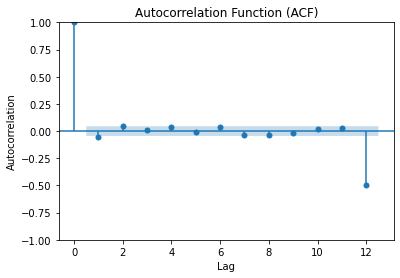

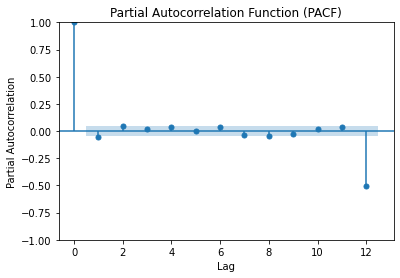

In [ ]:

sm.graphics.tsa.plot_acf(df2_daily.box_diff2[13:], lags=12)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF)")
plt.show()
sm.graphics.tsa.plot_pacf(df2_daily.box_diff2[13:], lags=12)
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()


There are not many spikes in the plots outside the insignificant zone (shaded) so there may not be enough information available in the residuals to be extracted by AR and MA models. 

# ARIMA Model  <a name="ARIMAModel"/>
AutoRegressive Integrated Moving Average

ARIMA models are denoted with the notation ARIMA(p, d, q). These parameters account for seasonality, trend, and noise in datasets:

     

1.  p - the number of lag observations to include in the model, or lag order.(AR)
2.  d - the number of times that the raw observations are differenced, or the degree of differencing. (I)
3.  q - the size of the moving average window, also called the order of moving average.(MA)


A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.
A value of 0 for a parameter indicates to not use that element of the model. 

## Parameter Selection

We will iteratively explore different combinations of parameters. For each combination we fit a new ARIMA model with SARIMAX() and assess its overall quality.

We will use the AIC (Akaike Information Criterion) value, returned with ARIMA models fitted using statsmodels. The AIC measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# Create a list of parameters to be used for model selection
ps = range(0, 3)
qs = range(0, 3)
d = 1
parameters = product(ps, qs)
parameters_list = list(parameters)

# Perform model selection using AIC
results=[]
best_aic = float("inf")
for param in parameters_list:
    try:
        model = ARIMA(df2_daily.close_box, order=(param[0], d, param[1])).fit()
        aic = model.aic
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
    except:
        continue

In [ ]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())


  parameters          aic
6     (2, 0) -7722.269351
7     (2, 1) -7722.175327
2     (0, 2) -7722.152348
5     (1, 2) -7721.666107
8     (2, 2) -7718.923560


## Analysis of Results  <a name="AnalysisARIMA"></a>



In [78]:
print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

Dickey–Fuller test:: p=0.000000


##Prediction


In [ ]:
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

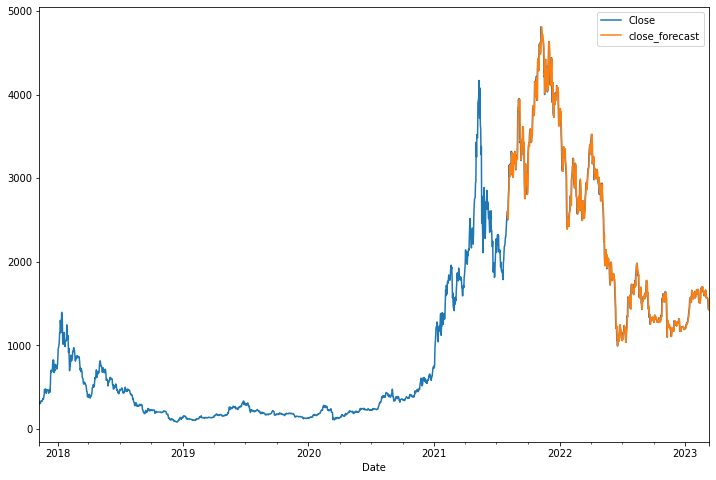

In [ ]:
# inverse Box-Cox transformation and plot predicted values
#Split data into training and testing sets
train_data, test_data = df2_daily['close_box'][:'2021-08-01'], df2_daily['close_box']['2021-08-02':]
df2_daily['close_box_diff_seasonal_12_forecast'] = best_model.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)
df2_daily['close_forecast'] = invboxcox(df2_daily.close_box_diff_seasonal_12_forecast, lmbda)
df2_daily[['Close', 'close_forecast']].plot(figsize=(12, 8))
plt.show()

## Validation <a name="validationSARIMAX"></a>

A simple indicator of how accurate out forecast is is the root mean square error (RMSE). So lets calcualte RMSE for the one-step ahead predictions starting from 2018.

Even accuracy is also calculated as well to find the effectiveness of a model in predicting.

In [ ]:
y_forecasted = df2_daily.close_forecast
y_truth = df2_daily['2018-1-31':].Close

# Compute the root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('Mean Squared Error: {}'.format(round(rmse, 2)))

Mean Squared Error: 107.16


In [ ]:
# Get the accuracy of the best model using the test set
predicted = best_model.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, typ='levels')
accuracy = (1 - abs(test_data - predicted).sum() / len(test_data)) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 98.12%


#Linear Regression

Linear regression is a statistical method for modelling the relationship between one or more independent variables and a dependent variable. It is assumed that the relationship between the variables is linear, which means that changes in the dependent variable are proportional to changes in the independent variable.
The goal of linear regression is to minimise the sum of the squared differences between the observed and predicted values in order to find the line of best fit that represents the relationship between the variables. The equation Y = b0 + b1X represents this line of best fit, where Y is the dependent variable, X is the independent variable, b0 is the intercept, and b1 is the slope of the line.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

##Parameter selecting

In [ ]:
X = df2.drop(["Close"], axis=1)
y = df2[["Close"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model configuring and Prediction

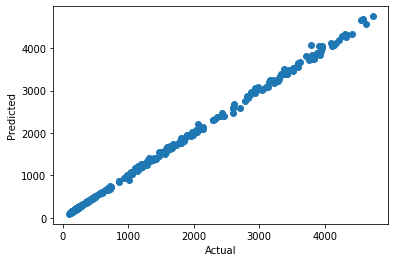

In [ ]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot the predicted percentage change in the Close price against the actual percentage change in the Close price
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

##Evaluation

In [ ]:
# Evaluate the model
#RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", format(round(rmse, 2))

Root Mean Squared Error:  35.35587170538758


In [ ]:
# Get the accuracy of the best model using the test set
accuracy = r2_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 99.92%


#Auto Arima

In [ ]:
!pip install statsforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.8/187.8 KB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.7/236.7 KB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.1/185.1 KB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 90.2 MB/s eta 0:00:00


In [ ]:
from statsforecast.models import AutoARIMA
from statsforecast import StatsForecast
from statsforecast.models import ARIMA